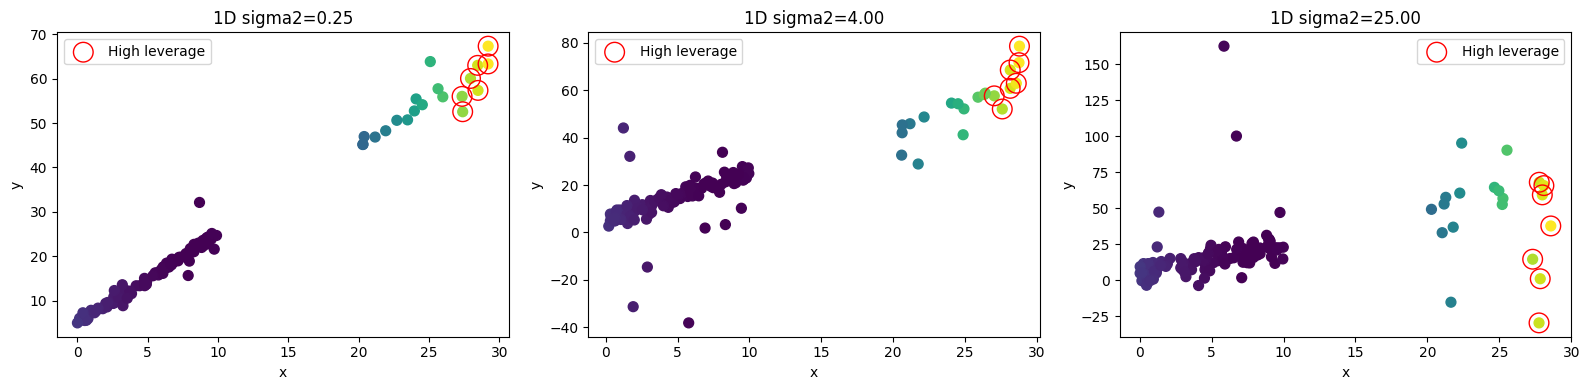

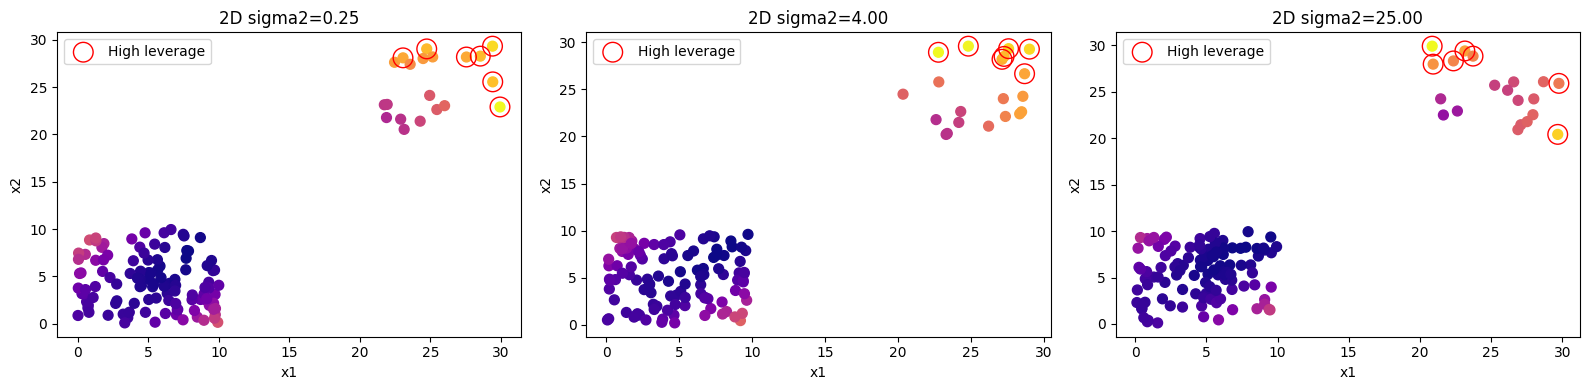

In [41]:
# 1.1 Ex. 1
# In this exercise we verify numerically the purpose of the leverage scores discussed
# in class. Generate a random linear model y = ax1 + b + ϵ where ϵ is random
# Gaussian noise with mean µ and variance σ2. For various values of µ, σ2 generate
# data and compute the leverage scores for all the points. Create four types of
# points: regular (low noise, close to the model), high variance on x, high variance
# on y and finally high variance on both x and y. Plot all results, group in subplots
# for the various values of noise variance. Mark on the plots the points with the
# highest leverage scores. Repeat the exercise for the 2D case y = ax1+bx2+c+ϵ.

import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(42)

def compute_leverage(X):
    H = X @ np.linalg.inv(X.T @ X) @ X.T
    return np.diag(H)

def generate_1d_data(n_regular=100, n_high_x=10, n_high_y=10, n_high_both=10, a=2, b=5, mu=0, sigma=1):
    # Regular points
    x_regular = np.random.uniform(0, 10, n_regular)
    y_regular = a * x_regular + b + np.random.normal(mu, sigma, n_regular)

    # High variance on x
    x_high_x = np.random.uniform(20, 30, n_high_x)
    y_high_x = a * x_high_x + b + np.random.normal(mu, sigma, n_high_x)

    # High variance on y
    x_high_y = np.random.uniform(0, 10, n_high_y)
    y_high_y = a * x_high_y + b + np.random.normal(mu, sigma * 10, n_high_y)  # bigger noise

    # High variance on both
    x_high_both = np.random.uniform(20, 30, n_high_both)
    y_high_both = a * x_high_both + b + np.random.normal(mu, sigma * 10, n_high_both)

    # Combine all
    x = np.concatenate([x_regular, x_high_x, x_high_y, x_high_both])
    y = np.concatenate([y_regular, y_high_x, y_high_y, y_high_both])
    labels = (["regular"] * n_regular +
              ["high_x"] * n_high_x +
              ["high_y"] * n_high_y +
              ["high_both"] * n_high_both)

    return x, y, np.array(labels)

def plot_1d_for_variances(variances=[0.5, 2, 5]):
    fig, axs = plt.subplots(1, len(variances), figsize=(16, 4))
    for i, sigma in enumerate(variances):
        x, y, labels = generate_1d_data(sigma=sigma)
        X = np.vstack([np.ones_like(x), x]).T
        leverage = compute_leverage(X)

        axs[i].scatter(x, y, c=leverage, cmap='viridis', s=50)
        axs[i].set_title(f"1D sigma2={sigma**2:.2f}")
        axs[i].set_xlabel("x")
        axs[i].set_ylabel("y")

        # Highlight points with highest leverage (top 5%)
        threshold = np.percentile(leverage, 95)
        axs[i].scatter(x[leverage > threshold], y[leverage > threshold], 
                       edgecolors='red', facecolors='none', s=200, label='High leverage')
        axs[i].legend()

    plt.tight_layout()
    plt.show()

def generate_2d_data(n_regular=100, n_high_x=10, n_high_y=10, n_high_both=10, a=2, b=3, c=5, mu=0, sigma=1):
    # Regular
    x1_regular = np.random.uniform(0, 10, n_regular)
    x2_regular = np.random.uniform(0, 10, n_regular)
    y_regular = a * x1_regular + b * x2_regular + c + np.random.normal(mu, sigma, n_regular)

    # High variance on x
    x1_high_x = np.random.uniform(20, 30, n_high_x)
    x2_high_x = np.random.uniform(20, 30, n_high_x)
    y_high_x = a * x1_high_x + b * x2_high_x + c + np.random.normal(mu, sigma, n_high_x)

    # High variance on y
    x1_high_y = np.random.uniform(0, 10, n_high_y)
    x2_high_y = np.random.uniform(0, 10, n_high_y)
    y_high_y = a * x1_high_y + b * x2_high_y + c + np.random.normal(mu, sigma * 10, n_high_y)

    # High variance on both
    x1_high_both = np.random.uniform(20, 30, n_high_both)
    x2_high_both = np.random.uniform(20, 30, n_high_both)
    y_high_both = a * x1_high_both + b * x2_high_both + c + np.random.normal(mu, sigma * 10, n_high_both)

    # Combine
    x1 = np.concatenate([x1_regular, x1_high_x, x1_high_y, x1_high_both])
    x2 = np.concatenate([x2_regular, x2_high_x, x2_high_y, x2_high_both])
    y = np.concatenate([y_regular, y_high_x, y_high_y, y_high_both])

    return x1, x2, y

def plot_2d_for_variances(variances=[0.5, 2, 5]):
    fig, axs = plt.subplots(1, len(variances), figsize=(16, 4))
    for i, sigma in enumerate(variances):
        x1, x2, y = generate_2d_data(sigma=sigma)
        X = np.vstack([np.ones_like(x1), x1, x2]).T
        leverage = compute_leverage(X)

        sc = axs[i].scatter(x1, x2, c=leverage, cmap='plasma', s=50)
        axs[i].set_title(f"2D sigma2={sigma**2:.2f}")
        axs[i].set_xlabel("x1")
        axs[i].set_ylabel("x2")

        # Mark high-leverage points
        threshold = np.percentile(leverage, 95)
        axs[i].scatter(x1[leverage > threshold], x2[leverage > threshold],
                       edgecolors='red', facecolors='none', s=200, label='High leverage')
        axs[i].legend()

    # fig.colorbar(sc, ax=axs, orientation='vertical', fraction=0.02)
    plt.tight_layout()
    plt.show()

plot_1d_for_variances()
plot_2d_for_variances()

(400, 2)
-----------
(400,)


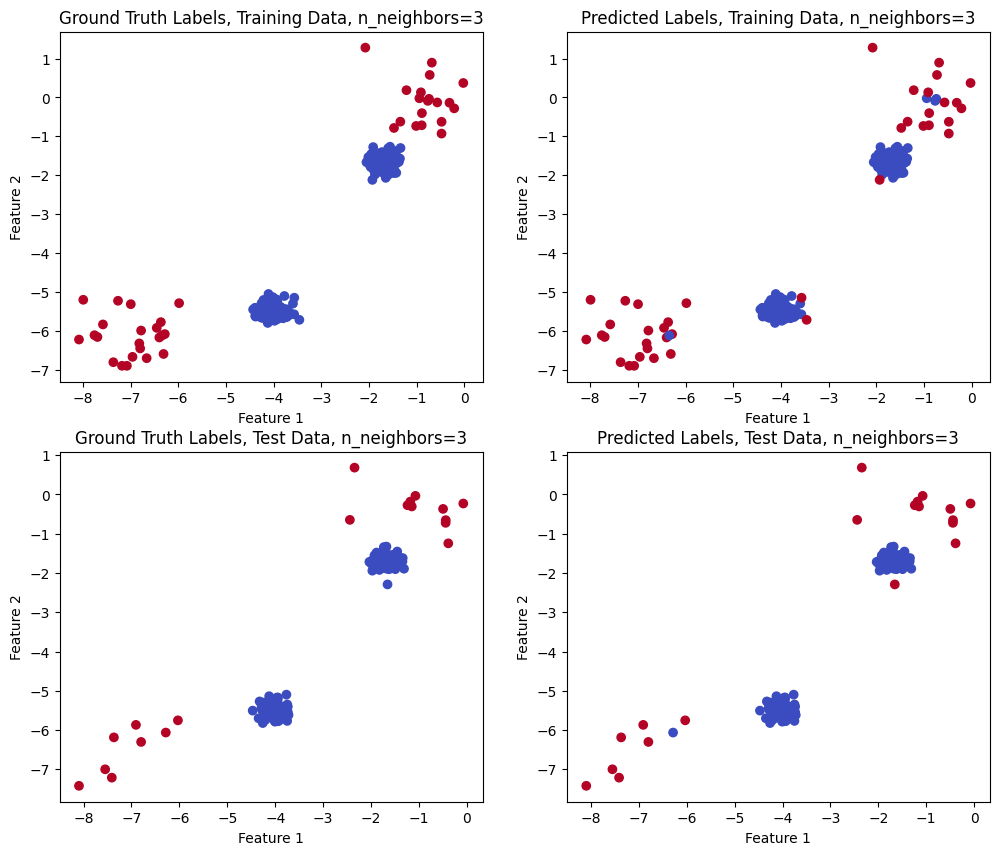

n_neighbors=3: Train Balanced Accuracy=0.9470, Test Balanced Accuracy=0.9709


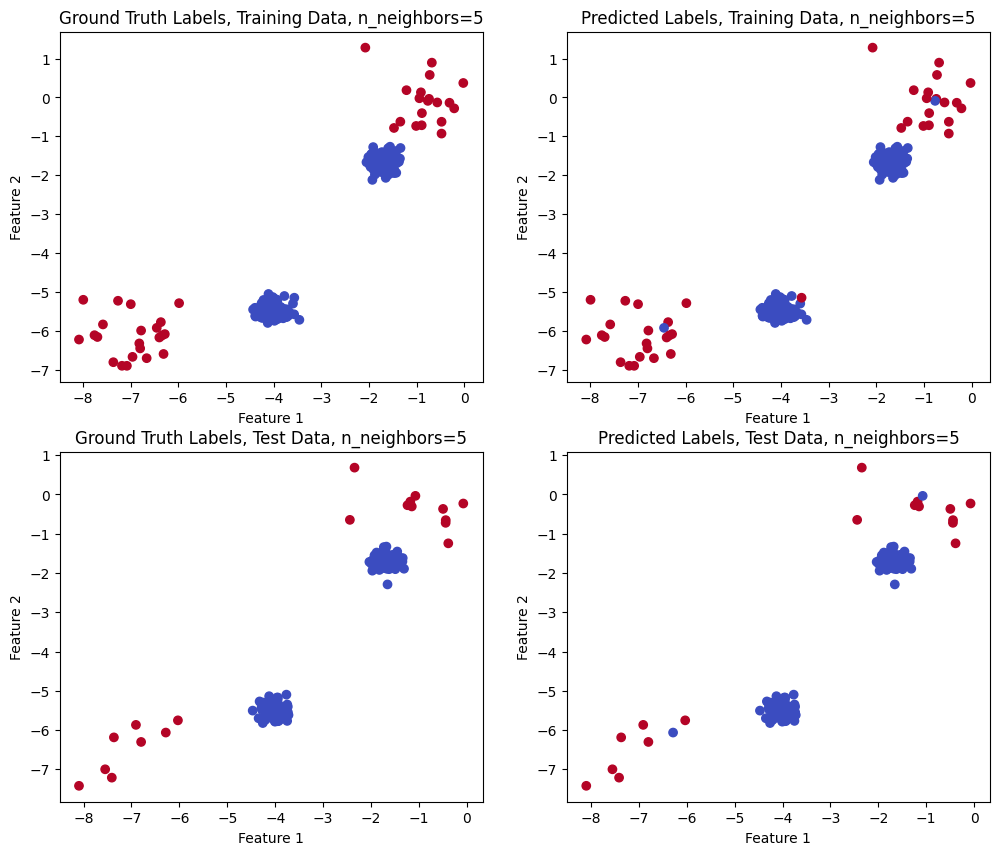

n_neighbors=5: Train Balanced Accuracy=0.9742, Test Balanced Accuracy=0.9474


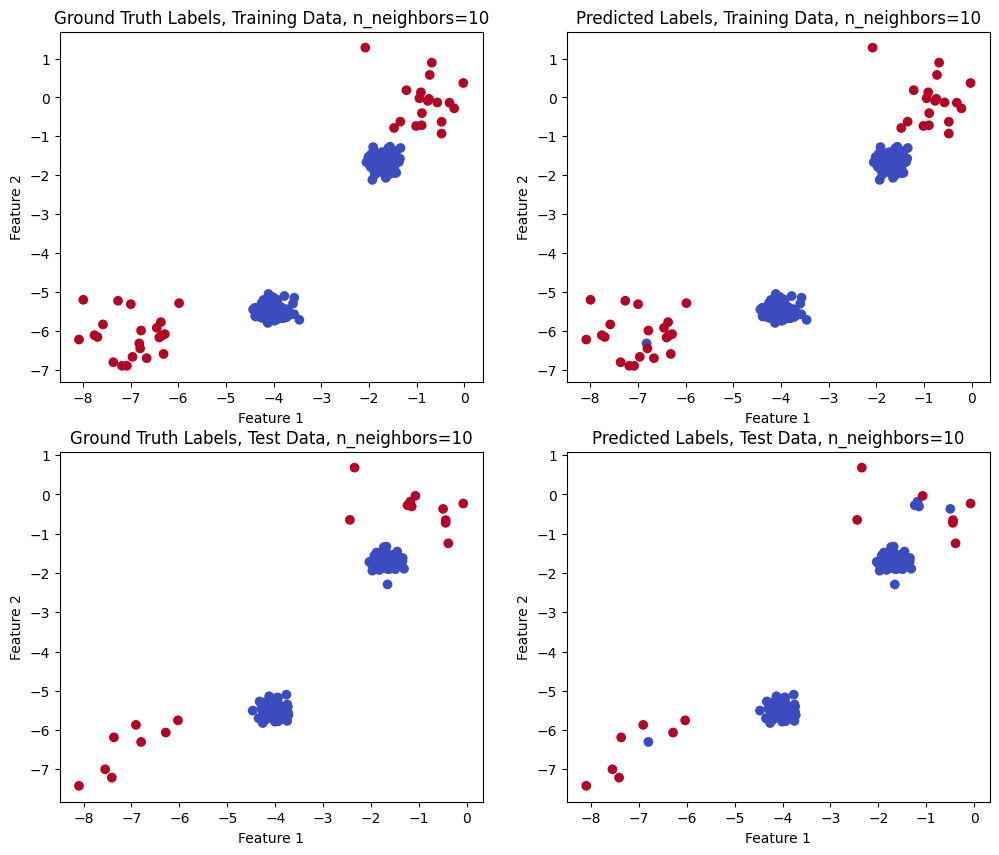

n_neighbors=10: Train Balanced Accuracy=0.9878, Test Balanced Accuracy=0.8684


In [117]:
# 1.2 Ex. 2
# Using the function generate data clusters generate a 2-dimensional dataset
# with 400 train samples and 200 test samples that are organized in 2 clusters,
# with 0.1 contamination. Train a KNN model from pyod.models.knn. Use 4
# subplots in order to display using different colors (for inliers and outliers):
# • Ground truth labels for training data
# • Predicted labels for training data
# • Ground truth labels for test data
# • Predicted labels for test data
# Use different values for the n neighbors parameter and observe how this
# affects the detection of small clusters of anomalies. Also compute the balanced
# accuracy for each parameter.

import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.utils.data import generate_data_clusters
from sklearn.metrics import balanced_accuracy_score

# np.random.seed(42)

generated_data = generate_data_clusters(n_train=400, n_test=200, n_clusters=2, n_features=2, contamination=0.1)
X_train, X_test, y_train, y_test = generated_data

print(X_train.shape)
print("-----------")
print(y_train.shape)

for neighbors in [3, 5, 10]:
    knn_model = KNN(n_neighbors=neighbors, contamination=0.1)
    knn_model.fit(X_train)
    y_train_pred = knn_model.labels_
    y_test_pred = knn_model.predict(X_test)

    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
    plt.title("Ground Truth Labels, Training Data, n_neighbors="+str(neighbors))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.subplot(2, 2, 2)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='coolwarm')
    plt.title("Predicted Labels, Training Data"+", n_neighbors="+str(neighbors))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.subplot(2, 2, 3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm')
    plt.title("Ground Truth Labels, Test Data"+", n_neighbors="+str(neighbors))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.subplot(2, 2, 4)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm')
    plt.title("Predicted Labels, Test Data"+", n_neighbors="+str(neighbors))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.show()

    train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
    test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)
    print(f"n_neighbors={neighbors}: Train Balanced Accuracy={train_balanced_acc:.4f}, Test Balanced Accuracy={test_balanced_acc:.4f}")


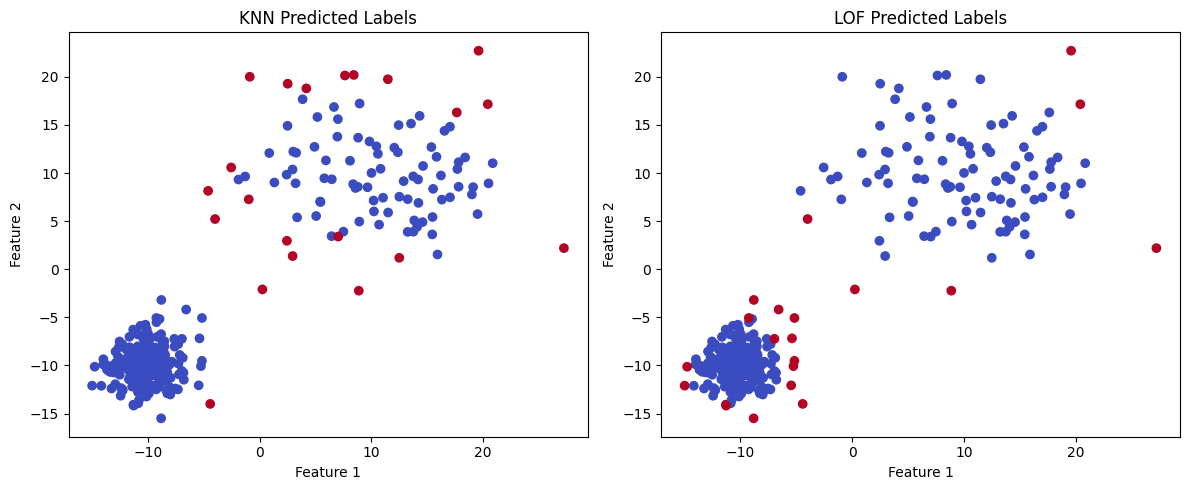

In [160]:
# 1.3 Ex. 3
# In this exercise we will see the limitations of distance based algorithms like
# KNN. Specifically, we will observe how KNN behaves when our data clusters
# have different densities and how pyod.models.lof.LOF solves the problem by
# considering the variations of the local densities of the datapoints. First, generate
# 2 clusters (200 and 100 samples respectively) with 2-dimensional samples using
# (-10, -10) and (10, 10) as centers, 2 and 6 as standard deviations using
# sklearn.datasets.make blobs() function. Then, fit KNN and LOF with the
# generated data using a small contamination rate (0.07) and find the predicted
# labels. Use 2 subplots to plot (using different colors for inliers and outliers) the
# 2 clusters and observe how the 2 models behave for different n neighbors

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pyod.models.knn import KNN
from pyod.models.lof import LOF

# np.random.seed(42)
X, y_true = make_blobs(n_samples=[200, 100], centers=[(-10, -10), (10, 10)],
                       cluster_std=[2, 6])
contamination = 0.07

knn_model = KNN(contamination=contamination)
knn_model.fit(X)
y_knn = knn_model.labels_

lof_model = LOF(contamination=contamination)
lof_model.fit(X)
y_lof = lof_model.labels_

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=y_knn, cmap='coolwarm')
axs[0].set_title("KNN Predicted Labels")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")

axs[1].scatter(X[:, 0], X[:, 1], c=y_lof, cmap='coolwarm')
axs[1].set_title("LOF Predicted Labels")
axs[1].set_xlabel("Feature 1")
axs[1].set_ylabel("Feature 2")
plt.tight_layout()
plt.show()

In [165]:
# 1.4 Ex. 4
# For this exercise we will need the cardio dataset from ODDS (https://odds.cs.
# stonybrook.edu/cardiotocogrpahy-dataset/). Load the data using scipy.io.loadmat()
# and use train test split() to split it into train and test subsets. Normalize
# your data accordingly. You will use an ensemble of classifiers of the same
# type (KNN or LOF) in order to create an average/maximization strategy
# (average/maximum score will be returned). Create 10 KNN/LOF models
# for which you vary parameter n neighbors from 30 to 120 (here you can use
# other intervals/steps if you observe that they produce better results). Fit each
# model, print the balanced accuracy (BA) for train/test data and store both the
# train and test scores in order to use them later. Normalize both scores using
# pyod.utils.utility.standardizer() and use pyod.models.combination.average()
# and pyod.models.combination.maximization() to find the final scores for
# the 2 strategies. For each of them find the threshold used for classification
# (using numpy.quantile() with the known contamination rate of the dataset),
# compute the predictions and print the balanced accuracy (BA).

# %pip install combo
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from pyod.models.knn import KNN
from pyod.utils.utility import standardizer
from pyod.models.combination import average, maximization

# 1. Load the dataset
data = loadmat("cardio.mat")  # Download from ODDS first: https://odds.cs.stonybrook.edu/cardiotocogrpahy-dataset/
X = data['X']
y = data['y'].ravel()  # 0 = inlier, 1 = outlier

contamination = np.mean(y)  # known contamination rate (~0.09)

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Train multiple KNN models with different n_neighbors
n_neighbors_list = range(30, 130, 10)  # 30, 40, ..., 120

train_scores_list = []
test_scores_list = []

print("=== Individual models ===")
for k in n_neighbors_list:
    clf = KNN(n_neighbors=k)
    clf.fit(X_train)
    
    # Predictions
    y_train_pred = clf.labels_          # binary predictions
    y_test_pred = clf.predict(X_test)
    
    # Scores (continuous anomaly scores, not labels)
    train_scores_list.append(clf.decision_scores_)   # shape: (n_train,)
    test_scores_list.append(clf.decision_function(X_test))  # shape: (n_test,)
    
    # Balanced accuracy
    train_ba = balanced_accuracy_score(y_train, y_train_pred)
    test_ba = balanced_accuracy_score(y_test, y_test_pred)
    print(f"KNN (k={k}): Train BA = {train_ba:.3f}, Test BA = {test_ba:.3f}")

# Stack all scores (shape: models × samples)
train_scores = np.vstack(train_scores_list).T
test_scores = np.vstack(test_scores_list).T

# 5. Normalize scores before combination
train_scores_norm, test_scores_norm = standardizer(train_scores, test_scores)

# 6. Combine scores — average and maximization
avg_train_scores = average(train_scores_norm)
avg_test_scores = average(test_scores_norm)

max_train_scores = maximization(train_scores_norm)
max_test_scores = maximization(test_scores_norm)

# 7. Compute threshold for classification
threshold_avg = np.quantile(avg_train_scores, 1 - contamination)
threshold_max = np.quantile(max_train_scores, 1 - contamination)

# 8. Predict final labels
y_train_pred_avg = (avg_train_scores > threshold_avg).astype(int)
y_test_pred_avg = (avg_test_scores > threshold_avg).astype(int)

y_train_pred_max = (max_train_scores > threshold_max).astype(int)
y_test_pred_max = (max_test_scores > threshold_max).astype(int)

# 9. Evaluate balanced accuracy
train_ba_avg = balanced_accuracy_score(y_train, y_train_pred_avg)
test_ba_avg = balanced_accuracy_score(y_test, y_test_pred_avg)

train_ba_max = balanced_accuracy_score(y_train, y_train_pred_max)
test_ba_max = balanced_accuracy_score(y_test, y_test_pred_max)

print("\n=== Ensemble results ===")
print(f"Average strategy:   Train BA = {train_ba_avg:.3f}, Test BA = {test_ba_avg:.3f}")
print(f"Maximization strategy: Train BA = {train_ba_max:.3f}, Test BA = {test_ba_max:.3f}")

=== Individual models ===
KNN (k=30): Train BA = 0.710, Test BA = 0.673
KNN (k=40): Train BA = 0.724, Test BA = 0.695
KNN (k=50): Train BA = 0.728, Test BA = 0.723
KNN (k=60): Train BA = 0.737, Test BA = 0.733
KNN (k=70): Train BA = 0.746, Test BA = 0.742
KNN (k=80): Train BA = 0.751, Test BA = 0.752
KNN (k=90): Train BA = 0.751, Test BA = 0.752
KNN (k=100): Train BA = 0.751, Test BA = 0.752
KNN (k=110): Train BA = 0.755, Test BA = 0.752
KNN (k=120): Train BA = 0.751, Test BA = 0.772

=== Ensemble results ===
Average strategy:   Train BA = 0.730, Test BA = 0.743
Maximization strategy: Train BA = 0.752, Test BA = 0.752
